In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import mean

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#wsi training

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/all_trans3.csv')
df

,# t_s,period,w_si,1400.0,1401.0,1402.0,1403.0,1404.0,1405.0,1406.0,1407.0,1408.0,1409.0,1410.0,1411.0,1412.0,1413.0,1414.0,1415.0,1416.0,1417.0,1418.0,1419.0,1420.0,1421.0,1422.0,1423.0,1424.0,1425.0,1426.0,1427.0,1428.0,1429.0,1430.0,1431.0,1432.0,1433.0,1434.0,1435.0,1436.0,...,1611.0,1612.0,1613.0,1614.0,1615.0,1616.0,1617.0,1618.0,1619.0,1620.0,1621.0,1622.0,1623.0,1624.0,1625.0,1626.0,1627.0,1628.0,1629.0,1630.0,1631.0,1632.0,1633.0,1634.0,1635.0,1636.0,1637.0,1638.0,1639.0,1640.0,1641.0,1642.0,1643.0,1644.0,1645.0,1646.0,1647.0,1648.0,1649.0,1650.0
0,208.0,450.0,382.50,0.951240,0.950670,0.95009,0.94949,0.94889,0.94828,0.94766,0.94702,0.94638,0.94573,0.94507,0.94440,0.94372,0.94303,0.94233,0.94163,0.94091,0.94019,0.93945,0.93871,0.93796,0.93720,0.93643,0.93566,0.93487,0.93408,0.93328,0.93247,0.93166,0.93083,0.93000,0.92916,0.92832,0.92747,0.92661,0.92574,0.92486,...,0.73293,0.73188,0.73083,0.72978,0.72874,0.72770,0.72666,0.72562,0.72458,0.72355,0.72252,0.72149,0.72047,0.71944,0.71842,0.71740,0.71639,0.71537,0.71436,0.71335,0.71234,0.71134,0.71034,0.70934,0.70834,0.70734,0.70635,0.70536,0.70437,0.70339,0.70240,0.70142,0.70045,0.69947,0.69850,0.69753,0.69656,0.69559,0.69463,0.69367
1,208.0,450.0,405.00,0.963090,0.962850,0.96260,0.96234,0.96207,0.96179,0.96149,0.96118,0.96086,0.96053,0.96018,0.95983,0.95946,0.95908,0.95869,0.95828,0.95787,0.95744,0.95701,0.95656,0.95610,0.95563,0.95515,0.95466,0.95415,0.95364,0.95312,0.95258,0.95204,0.95148,0.95091,0.95034,0.94975,0.94915,0.94855,0.94793,0.94731,...,0.76473,0.76361,0.76250,0.76138,0.76027,0.75916,0.75805,0.75694,0.75584,0.75473,0.75363,0.75253,0.75143,0.75034,0.74924,0.74815,0.74706,0.74597,0.74488,0.74380,0.74271,0.74163,0.74055,0.73948,0.73840,0.73733,0.73626,0.73519,0.73412,0.73306,0.73199,0.73093,0.72988,0.72882,0.72777,0.72672,0.72567,0.72462,0.72357,0.72253
2,208.0,450.0,270.00,0.787300,0.786100,0.78491,0.78372,0.78253,0.78135,0.78017,0.77899,0.77781,0.77663,0.77546,0.77429,0.77313,0.77196,0.77080,0.76964,0.76848,0.76733,0.76618,0.76503,0.76388,0.76274,0.76160,0.76046,0.75933,0.75820,0.75707,0.75594,0.75482,0.75370,0.75259,0.75147,0.75036,0.74925,0.74815,0.74705,0.74595,...,0.60222,0.60165,0.60108,0.60051,0.59995,0.59939,0.59883,0.59827,0.59772,0.59717,0.59662,0.59607,0.59552,0.59498,0.59444,0.59390,0.59337,0.59283,0.59230,0.59177,0.59125,0.59072,0.59020,0.58968,0.58916,0.58865,0.58813,0.58762,0.58711,0.58660,0.58610,0.58560,0.58510,0.58460,0.58410,0.58361,0.58311,0.58262,0.58214,0.58165
3,208.0,450.0,225.00,0.701080,0.700130,0.69918,0.69823,0.69729,0.69635,0.69542,0.69449,0.69357,0.69264,0.69173,0.69081,0.68990,0.68900,0.68810,0.68720,0.68630,0.68541,0.68453,0.68365,0.68277,0.68189,0.68102,0.68016,0.67929,0.67843,0.67758,0.67673,0.67588,0.67503,0.67419,0.67336,0.67252,0.67170,0.67087,0.67005,0.66923,...,0.57256,0.57222,0.57187,0.57153,0.57120,0.57086,0.57053,0.57019,0.56986,0.56953,0.56920,0.56888,0.56855,0.56823,0.56791,0.56759,0.56727,0.56696,0.56664,0.56633,0.56602,0.56571,0.56541,0.56510,0.56480,0.56449,0.56419,0.56389,0.56360,0.56330,0.56301,0.56271,0.56242,0.56213,0.56184,0.56156,0.56127,0.56099,0.56071,0.56043
4,208.0,450.0,292.50,0.829690,0.828470,0.82725,0.82604,0.82482,0.82361,0.82239,0.82118,0.81996,0.81875,0.81754,0.81633,0.81512,0.81391,0.81270,0.81149,0.81029,0.80908,0.80788,0.80668,0.80548,0.80428,0.80308,0.80189,0.80069,0.79950,0.79831,0.79712,0.79593,0.79474,0.79356,0.79238,0.79119,0.79001,0.78884,0.78766,0.78649,...,0.62351,0.62283,0.62215,0.62147,0.62080,0.62013,0.61947,0.61880,0.61814,0.61748,0.61682,0.61617,0.61552,0.61487,0.61422,0.61358,0.61293,0.61229,0.61166,0.61102,0.61039,0.60976,0.60913,0.60851,0.60789,0.60727,0.60665,0.60604,0.60542,0.60481,0.60420,0.60360,0.60300,0.60239,0.60180,0.60120,0.60061,0.60001,0.59943,0.59884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
X = df.drop(['w_si'], 1)
Y = df.drop(X, 1)

#X = df.values[:, :3]
#Y = df.values[:, 3:]
X = X.values
Y = Y.values

In [ ]:
scaler_wsi = preprocessing.StandardScaler().fit(Y)
Y = scaler_wsi.transform(Y)

scaler_R = preprocessing.StandardScaler().fit(X[:, 2:])
X[:, 2:] = scaler_R.transform(X[:, 2:])

scaler_ts = preprocessing.StandardScaler().fit(X[:, 0:1])
X[:, 0:1] = scaler_ts.transform(X[:, 0:1])

scaler_period = preprocessing.StandardScaler().fit(X[:, 1:2])
X[:, 1:2] = scaler_period.transform(X[:, 1:2])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(47079, 253) (5232, 253) (47079, 1) (5232, 1)


In [ ]:
model_wsi = Sequential([
    Dense(100, activation='relu', input_shape=X_train[0].shape),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation= 'linear')
])

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

model_wsi.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.MeanSquaredError(),
              metrics=['acc'])

hist = model_wsi.fit(X_train, Y_train,
          batch_size=32, epochs=400, 
          validation_data=(X_test, Y_test))

Epoch 1/400
1472/1472 [==============================] - 4s 2ms/step - loss: 0.0837 - acc: 0.0000e+00 - val_loss: 0.0301 - val_acc: 0.0000e+00
Epoch 2/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0271 - acc: 0.0000e+00 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 3/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0196 - acc: 0.0000e+00 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 4/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0201 - acc: 0.0000e+00 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 5/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0143 - acc: 0.0000e+00 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 6/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.0380 - val_acc: 0.0000e+00
Epoch 7/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
preds = model_wsi.predict(X_test)

In [ ]:
preds

array([[-0.15844937],
       [ 2.4637854 ],
       [-0.5364138 ],
       ...,
       [ 0.7505237 ],
       [ 0.3438227 ],
       [-0.9022558 ]], dtype=float32)

In [ ]:
 import keras.backend as K 

def my_accuracy(y_pred, y_true):
    diff = K.abs(y_true-y_pred)
    correct = K.less(diff, 0.05)
    return K.mean(correct)

In [ ]:
my_accuracy(preds, Y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.98165137>

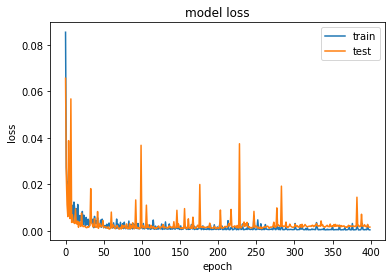

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
#plt.ylim([0, 0.002])

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.024842


In [ ]:
model_wsi.save('/content/gdrive/MyDrive/model_nn_wsi.h5') 

#period training

In [ ]:
model_wsi = tf.keras.models.load_model('/content/gdrive/MyDrive/model_nn_wsi.h5')

In [ ]:
preds = model_wsi.predict(X_test)

In [ ]:
my_accuracy(preds, Y_test)

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/all_trans3.csv')
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df

,# t_s,period,w_si,1400.0,1401.0,1402.0,1403.0,1404.0,1405.0,1406.0,1407.0,1408.0,1409.0,1410.0,1411.0,1412.0,1413.0,1414.0,1415.0,1416.0,1417.0,1418.0,1419.0,1420.0,1421.0,1422.0,1423.0,1424.0,1425.0,1426.0,1427.0,1428.0,1429.0,1430.0,1431.0,1432.0,1433.0,1434.0,1435.0,1436.0,...,1611.0,1612.0,1613.0,1614.0,1615.0,1616.0,1617.0,1618.0,1619.0,1620.0,1621.0,1622.0,1623.0,1624.0,1625.0,1626.0,1627.0,1628.0,1629.0,1630.0,1631.0,1632.0,1633.0,1634.0,1635.0,1636.0,1637.0,1638.0,1639.0,1640.0,1641.0,1642.0,1643.0,1644.0,1645.0,1646.0,1647.0,1648.0,1649.0,1650.0
40603,210.0,910.0,796.25,0.96503,0.96517,0.96529,0.96538,0.96544,0.965450,0.965370,0.965110,0.964400,0.962090,0.950160,0.553490,0.912140,0.95198,0.95862,0.96090,0.96194,0.96246,0.96273,0.96285,0.96288,0.96284,0.96275,0.96262,0.962460,0.962270,0.962050,0.96182,0.96156,0.96128,0.96099,0.96068,0.96035,0.96000,0.95964,0.95926,0.95887,...,0.789890,0.788790,0.78769,0.786600,0.785500,0.784410,0.783320,0.782240,0.781150,0.780070,0.778980,0.777900,0.776830,0.775750,0.774680,0.773600,0.772540,0.771470,0.77040,0.76934,0.768280,0.767220,0.766160,0.765110,0.764060,0.763010,0.761960,0.760910,0.759870,0.758830,0.757790,0.756760,0.755720,0.754690,0.753660,0.752640,0.75162,0.75060,0.74958,0.74856
29903,246.0,410.0,266.50,0.94036,0.94116,0.94194,0.94272,0.94348,0.944220,0.944960,0.945680,0.946380,0.947080,0.947760,0.948430,0.949080,0.94972,0.95035,0.95097,0.95157,0.95216,0.95274,0.95330,0.95385,0.95439,0.95492,0.95543,0.955930,0.956410,0.956890,0.95734,0.95779,0.95822,0.95864,0.95905,0.95945,0.95983,0.96020,0.96055,0.96090,...,0.876870,0.875930,0.87499,0.874040,0.873100,0.872160,0.871210,0.870260,0.869310,0.868360,0.867410,0.866460,0.865510,0.864560,0.863600,0.862650,0.861690,0.860730,0.85977,0.85882,0.857860,0.856900,0.855940,0.854980,0.854020,0.853050,0.852090,0.851130,0.850170,0.849200,0.848240,0.847280,0.846310,0.845350,0.844390,0.843420,0.84246,0.84149,0.84053,0.83957
46371,241.0,610.0,488.00,0.24575,0.21812,0.18871,0.15780,0.12590,0.093892,0.063133,0.035588,0.013934,0.001542,0.002236,0.019722,0.056693,0.11380,0.18896,0.27740,0.37268,0.46815,0.55829,0.63939,0.70967,0.76883,0.81753,0.85697,0.888490,0.913450,0.933030,0.94828,0.96006,0.96908,0.97591,0.98100,0.98472,0.98736,0.98915,0.99027,0.99087,...,0.940760,0.940160,0.93955,0.938940,0.938330,0.937710,0.937090,0.936460,0.935830,0.935200,0.934560,0.933920,0.933270,0.932620,0.931970,0.931310,0.930650,0.929990,0.92932,0.92865,0.927980,0.927300,0.926630,0.925950,0.925270,0.924590,0.923900,0.923210,0.922530,0.921840,0.921150,0.920460,0.919770,0.919080,0.918380,0.917690,0.91700,0.91631,0.91562,0.91493
5392,247.0,580.0,464.00,0.91552,0.91334,0.91131,0.90942,0.90766,0.906020,0.904510,0.903110,0.901810,0.900620,0.899530,0.898540,0.897630,0.89680,0.89606,0.89539,0.89480,0.89427,0.89382,0.89342,0.89309,0.89281,0.89259,0.89241,0.892290,0.892220,0.892190,0.89220,0.89226,0.89235,0.89248,0.89265,0.89285,0.89308,0.89334,0.89363,0.89395,...,0.962280,0.962090,0.96190,0.961710,0.961520,0.961330,0.961130,0.960940,0.960750,0.960560,0.960380,0.960200,0.960020,0.959850,0.959690,0.959540,0.959400,0.959270,0.95915,0.95906,0.958980,0.958930,0.958900,0.958900,0.958940,0.959020,0.959140,0.959310,0.959530,0.959820,0.960180,0.960610,0.961120,0.961690,0.962290,0.962850,0.96320,0.96291,0.96095,0.95454
46762,241.0,400.0,350.00,0.78254,0.78422,0.78590,0.78758,0.78925,0.790920,0.792590,0.794250,0.795910,0.797570,0.799220,0.800870,0.802520,0.80416,0.80580,0.80744,0.80907,0.81070,0.81232,0.81394,0.81555,0.81716,0.81877,0.82037,0.821970,0.823560,0.825140,0.82672,0.82830,0.82987,0.83144,0.83300,0.83455,0.83610,0.83764,0.83918,0.84071,...,0.961780,0.961530,0.96127,0.961000,0.960720,0.960430,0.960130,0.959820,0.959510,0.959180,0.958850,0.958510,0.958160,0.957790,0.957430,0.957050,0.956660,0.956270,0.95586,0.95545,0.955030,0.954600,0.954170,0.953720,0.953270,0.952810,0.952340,0.951860,0.951380,0.950890,0.950390,0.949880,0.949360,0.948840,0.948310,0.947770,0.94723,0.94668,0.94612,0.

In [ ]:
X = df.drop(['period'], 1)
Y = df.drop(X, 1)

#X = df.values[:, :3]
#Y = df.values[:, 3:]
X = X.values
Y = Y.values

In [ ]:
Y = scaler_period.transform(Y)

X[:, 0:1] = scaler_ts.transform(X[:, 0:1])
X[:, 1:2] = scaler_wsi.transform(X[:, 1:2])
X[:, 2:] = scaler_R.transform(X[:, 2:])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(47079, 253) (5232, 253) (47079, 1) (5232, 1)


In [ ]:
model_period = Sequential([
    Dense(40, activation='relu', input_shape=X_train[0].shape),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(1, activation= 'linear')
])

In [ ]:
model_period.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.MeanSquaredError(),
              metrics=['acc'])

hist = model_period.fit(X_train, Y_train,
          batch_size=100, epochs=400, 
          validation_data=(X_test, Y_test))

Epoch 1/400
471/471 [==============================] - 1s 2ms/step - loss: 0.1437 - acc: 0.0000e+00 - val_loss: 0.0509 - val_acc: 0.0000e+00
Epoch 2/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0336 - acc: 0.0000e+00 - val_loss: 0.0289 - val_acc: 0.0000e+00
Epoch 3/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0208 - acc: 0.0000e+00 - val_loss: 0.0163 - val_acc: 0.0000e+00
Epoch 4/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0142 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 5/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0118 - acc: 0.0000e+00 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 6/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 7/400
471/471 [==============================] - 1s 2ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 8/400
4

In [ ]:
y_pred = model_period.predict(X_train)

In [ ]:
import keras.backend as K 

def my_accuracy(y_pred, y_true):
    diff = K.abs(y_true-y_pred)
    correct = K.less(diff, 0.05)
    return K.mean(correct)

In [ ]:
my_accuracy(y_pred, Y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9607043>

In [ ]:
mse = mean_squared_error(Y_train, y_pred)
print("RMSE: %f" % (mse))

RMSE: 0.000547


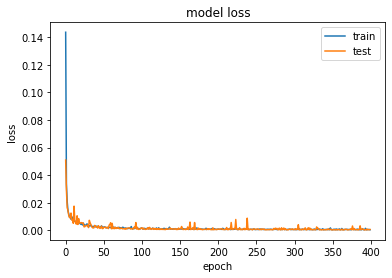

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
#plt.ylim([0, 0.002])

In [ ]:
model_period.save('/content/gdrive/MyDrive/model_nn_period.h5') 

#ts training

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/all_trans3.csv')
df

,# t_s,period,w_si,1400.0,1401.0,1402.0,1403.0,1404.0,1405.0,1406.0,1407.0,1408.0,1409.0,1410.0,1411.0,1412.0,1413.0,1414.0,1415.0,1416.0,1417.0,1418.0,1419.0,1420.0,1421.0,1422.0,1423.0,1424.0,1425.0,1426.0,1427.0,1428.0,1429.0,1430.0,1431.0,1432.0,1433.0,1434.0,1435.0,1436.0,...,1611.0,1612.0,1613.0,1614.0,1615.0,1616.0,1617.0,1618.0,1619.0,1620.0,1621.0,1622.0,1623.0,1624.0,1625.0,1626.0,1627.0,1628.0,1629.0,1630.0,1631.0,1632.0,1633.0,1634.0,1635.0,1636.0,1637.0,1638.0,1639.0,1640.0,1641.0,1642.0,1643.0,1644.0,1645.0,1646.0,1647.0,1648.0,1649.0,1650.0
0,208.0,450.0,382.50,0.951240,0.950670,0.95009,0.94949,0.94889,0.94828,0.94766,0.94702,0.94638,0.94573,0.94507,0.94440,0.94372,0.94303,0.94233,0.94163,0.94091,0.94019,0.93945,0.93871,0.93796,0.93720,0.93643,0.93566,0.93487,0.93408,0.93328,0.93247,0.93166,0.93083,0.93000,0.92916,0.92832,0.92747,0.92661,0.92574,0.92486,...,0.73293,0.73188,0.73083,0.72978,0.72874,0.72770,0.72666,0.72562,0.72458,0.72355,0.72252,0.72149,0.72047,0.71944,0.71842,0.71740,0.71639,0.71537,0.71436,0.71335,0.71234,0.71134,0.71034,0.70934,0.70834,0.70734,0.70635,0.70536,0.70437,0.70339,0.70240,0.70142,0.70045,0.69947,0.69850,0.69753,0.69656,0.69559,0.69463,0.69367
1,208.0,450.0,405.00,0.963090,0.962850,0.96260,0.96234,0.96207,0.96179,0.96149,0.96118,0.96086,0.96053,0.96018,0.95983,0.95946,0.95908,0.95869,0.95828,0.95787,0.95744,0.95701,0.95656,0.95610,0.95563,0.95515,0.95466,0.95415,0.95364,0.95312,0.95258,0.95204,0.95148,0.95091,0.95034,0.94975,0.94915,0.94855,0.94793,0.94731,...,0.76473,0.76361,0.76250,0.76138,0.76027,0.75916,0.75805,0.75694,0.75584,0.75473,0.75363,0.75253,0.75143,0.75034,0.74924,0.74815,0.74706,0.74597,0.74488,0.74380,0.74271,0.74163,0.74055,0.73948,0.73840,0.73733,0.73626,0.73519,0.73412,0.73306,0.73199,0.73093,0.72988,0.72882,0.72777,0.72672,0.72567,0.72462,0.72357,0.72253
2,208.0,450.0,270.00,0.787300,0.786100,0.78491,0.78372,0.78253,0.78135,0.78017,0.77899,0.77781,0.77663,0.77546,0.77429,0.77313,0.77196,0.77080,0.76964,0.76848,0.76733,0.76618,0.76503,0.76388,0.76274,0.76160,0.76046,0.75933,0.75820,0.75707,0.75594,0.75482,0.75370,0.75259,0.75147,0.75036,0.74925,0.74815,0.74705,0.74595,...,0.60222,0.60165,0.60108,0.60051,0.59995,0.59939,0.59883,0.59827,0.59772,0.59717,0.59662,0.59607,0.59552,0.59498,0.59444,0.59390,0.59337,0.59283,0.59230,0.59177,0.59125,0.59072,0.59020,0.58968,0.58916,0.58865,0.58813,0.58762,0.58711,0.58660,0.58610,0.58560,0.58510,0.58460,0.58410,0.58361,0.58311,0.58262,0.58214,0.58165
3,208.0,450.0,225.00,0.701080,0.700130,0.69918,0.69823,0.69729,0.69635,0.69542,0.69449,0.69357,0.69264,0.69173,0.69081,0.68990,0.68900,0.68810,0.68720,0.68630,0.68541,0.68453,0.68365,0.68277,0.68189,0.68102,0.68016,0.67929,0.67843,0.67758,0.67673,0.67588,0.67503,0.67419,0.67336,0.67252,0.67170,0.67087,0.67005,0.66923,...,0.57256,0.57222,0.57187,0.57153,0.57120,0.57086,0.57053,0.57019,0.56986,0.56953,0.56920,0.56888,0.56855,0.56823,0.56791,0.56759,0.56727,0.56696,0.56664,0.56633,0.56602,0.56571,0.56541,0.56510,0.56480,0.56449,0.56419,0.56389,0.56360,0.56330,0.56301,0.56271,0.56242,0.56213,0.56184,0.56156,0.56127,0.56099,0.56071,0.56043
4,208.0,450.0,292.50,0.829690,0.828470,0.82725,0.82604,0.82482,0.82361,0.82239,0.82118,0.81996,0.81875,0.81754,0.81633,0.81512,0.81391,0.81270,0.81149,0.81029,0.80908,0.80788,0.80668,0.80548,0.80428,0.80308,0.80189,0.80069,0.79950,0.79831,0.79712,0.79593,0.79474,0.79356,0.79238,0.79119,0.79001,0.78884,0.78766,0.78649,...,0.62351,0.62283,0.62215,0.62147,0.62080,0.62013,0.61947,0.61880,0.61814,0.61748,0.61682,0.61617,0.61552,0.61487,0.61422,0.61358,0.61293,0.61229,0.61166,0.61102,0.61039,0.60976,0.60913,0.60851,0.60789,0.60727,0.60665,0.60604,0.60542,0.60481,0.60420,0.60360,0.60300,0.60239,0.60180,0.60120,0.60061,0.60001,0.59943,0.59884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
X = df.drop(['# t_s'], 1)
Y = df.drop(X, 1)

#X = df.values[:, :3]
#Y = df.values[:, 3:]
X = X.values
Y = Y.values

In [ ]:
#scaler_ts = preprocessing.StandardScaler().fit(Y)
Y = scaler_ts.transform(Y)

X[:, 2:] = scaler_R.transform(X[:, 2:])
X[:, 0:1] = scaler_period.transform(X[:, 0:1])
X[:, 1:2] = scaler_wsi.transform(X[:, 1:2])


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(47079, 253) (5232, 253) (47079, 1) (5232, 1)


In [ ]:
model_ts = Sequential([
    Dense(100, activation='relu', input_shape=X_train[0].shape),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(1, activation= 'linear')
])

In [ ]:
import keras.backend as K 

model_ts.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.MeanSquaredError(),
              metrics=['acc'])

hist = model_ts.fit(X_train, Y_train,
          batch_size=32, epochs=400, 
          validation_data=(X_test, Y_test))

Epoch 1/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.2799 - acc: 0.0000e+00 - val_loss: 0.1364 - val_acc: 0.0000e+00
Epoch 2/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.1122 - acc: 0.0000e+00 - val_loss: 0.1099 - val_acc: 0.0000e+00
Epoch 3/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0811 - acc: 0.0000e+00 - val_loss: 0.0736 - val_acc: 0.0000e+00
Epoch 4/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0740 - acc: 0.0000e+00 - val_loss: 0.0579 - val_acc: 0.0000e+00
Epoch 5/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0668 - acc: 0.0000e+00 - val_loss: 0.0567 - val_acc: 0.0000e+00
Epoch 6/400
1472/1472 [==============================] - 3s 2ms/step - loss: 0.0570 - acc: 0.0000e+00 - val_loss: 0.0369 - val_acc: 0.0000e+00
Epoch 7/400
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0514 - acc: 0.0000e+00 - val_loss: 0.0881 - val_acc: 0.0000e+00

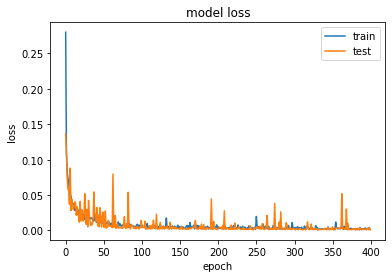

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
#plt.ylim([0, 0.002])

In [ ]:
y_pred = model_ts.predict(X_test)

In [ ]:
import keras.backend as K 

def my_accuracy(y_pred, y_true):
    diff = K.abs(y_true-y_pred)
    correct = K.less(diff, 0.05)
    return K.mean(correct)

In [ ]:
my_accuracy(y_pred, Y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9239297>

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.031987


In [ ]:
model_ts.save('/content/gdrive/MyDrive/model_nn_ts.h5') 

#testing

In [ ]:
model_period = tf.keras.models.load_model('/content/gdrive/MyDrive/model_nn_period.h5')
model_wsi = tf.keras.models.load_model('/content/gdrive/MyDrive/model_nn_wsi.h5')
model_ts = tf.keras.models.load_model('/content/gdrive/MyDrive/model_nn_ts.h5')

In [ ]:
model_ts.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               25400     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 65,901
Trainable params: 65,901
Non-trainable params: 0
__________________________________________________

In [ ]:
prreds = model_wsi.predict(X_test)

In [ ]:
 import keras.backend as K 

def my_accuracy(y_pred, y_true):
    diff = K.abs(y_true-y_pred)
    correct = K.less(diff, 0.05)
    return K.mean(correct)

In [ ]:
my_accuracy(prreds, Y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.94227827>

Text(0.5, 1.0, 'Input')

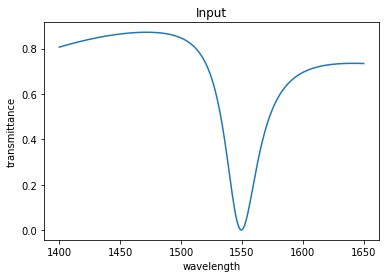

In [ ]:
x_axis = [i for i in range(1400, 1651)]

plt.plot(x_axis, scaler_R.inverse_transform(X_test[:, 2:])[88])
plt.xlabel('wavelength')
plt.ylabel('transmittance')
plt.title('Input')
  

In [ ]:
scaler_R.inverse_transform(X_test[:, 2:])[88]

array([8.0612e-01, 8.0770e-01, 8.0926e-01, 8.1081e-01, 8.1234e-01,
       8.1386e-01, 8.1536e-01, 8.1685e-01, 8.1832e-01, 8.1977e-01,
       8.2121e-01, 8.2263e-01, 8.2404e-01, 8.2543e-01, 8.2680e-01,
       8.2815e-01, 8.2949e-01, 8.3081e-01, 8.3212e-01, 8.3340e-01,
       8.3467e-01, 8.3593e-01, 8.3716e-01, 8.3838e-01, 8.3957e-01,
       8.4075e-01, 8.4192e-01, 8.4306e-01, 8.4419e-01, 8.4529e-01,
       8.4638e-01, 8.4745e-01, 8.4850e-01, 8.4953e-01, 8.5054e-01,
       8.5153e-01, 8.5250e-01, 8.5345e-01, 8.5438e-01, 8.5529e-01,
       8.5618e-01, 8.5705e-01, 8.5790e-01, 8.5872e-01, 8.5953e-01,
       8.6031e-01, 8.6107e-01, 8.6181e-01, 8.6253e-01, 8.6322e-01,
       8.6389e-01, 8.6453e-01, 8.6515e-01, 8.6575e-01, 8.6632e-01,
       8.6686e-01, 8.6738e-01, 8.6788e-01, 8.6834e-01, 8.6878e-01,
       8.6919e-01, 8.6957e-01, 8.6992e-01, 8.7025e-01, 8.7054e-01,
       8.7080e-01, 8.7102e-01, 8.7122e-01, 8.7138e-01, 8.7150e-01,
       8.7159e-01, 8.7164e-01, 8.7165e-01, 8.7162e-01, 8.7155e

In [ ]:

def pred_params(model_period, model_wsi, model_ts, test_arr):
  t_s = [-6.432930734567939e-16]
  w_si = [7.66762964455997e-17]
  period = [-2.9841952753052706e-16]
  test = np.ones([253])

  i = 0
  test[2:] = test_arr

  go = True
  while go == True:
    test[0] = t_s[-1]
    test[1] = w_si[-1]

    period = np.append(period, model_period.predict(np.array([test])))

    test[0] = t_s[-1]
    test[1] = period[-1] 

    w_si = np.append(w_si, model_wsi.predict(np.array([test])))

    test[0] = period[-1]
    test[1] = w_si[-1] 

    t_s = np.append(t_s, model_ts.predict(np.array([test])))

    if (abs(t_s[-1]-t_s[-2])<=0.000001 and abs(w_si[-1]-w_si[-2])<=0.000001 and abs(period[-1]-period[-2])<=0.000001):
      go = False 
    
    print(i)
    i = i+1

  print("t_s: ", scaler_ts.inverse_transform([t_s[-1]]))
  print("period: ", scaler_period.inverse_transform([period[-1]]))
  print("w_si: ", scaler_wsi.inverse_transform([w_si[-1]]))


In [ ]:
import math
def eval(required, received_file):
  df1 = pd.read_table(received_file,  header=None, sep='\s+').values
  X_orig = df1[:, 0:1]
  T_orig = df1[:, 1:]
  print([item for sublist in T_orig for item in sublist])

  rmse = np.sqrt(mean_squared_error(required, T_orig))
  print("rmse: ", rmse)

  mse = mean_squared_error(required, T_orig)

  rmse = math.sqrt(mse)

  print(mse)
  plt.plot(X_orig, required, '.')
  plt.plot(X_orig, T_orig)

  plt.legend(["input respose", "response from parameters"])
  plt.title('DL based')
  plt.xlabel('wavelength')
  plt.ylabel('transmittance')

In [ ]:
pred_params(model_period, model_wsi, model_ts, X_test[:, 2:][88])

0
1
2
3
4
5
t_s:  [232.68397009]
period:  [725.53415122]
w_si:  [548.28264463]


In [ ]:
scaler_wsi.inverse_transform(X_test[:, 1:2][88])

array([547.5])

In [ ]:
scaler_ts.inverse_transform(X_test[:, 0:1][88])

array([233.])

In [ ]:
scaler_period.inverse_transform(Y_test[88])

array([730.])

[0.81161, 0.81318, 0.8147399999999999, 0.81628, 0.81781, 0.81932, 0.8208200000000001, 0.8223, 0.82376, 0.82521, 0.82665, 0.8280700000000001, 0.82947, 0.83085, 0.8322200000000001, 0.8335799999999999, 0.83491, 0.8362299999999999, 0.83754, 0.8388200000000001, 0.84009, 0.84135, 0.8425799999999999, 0.8438, 0.845, 0.8461799999999999, 0.84735, 0.8485, 0.8496299999999999, 0.8507399999999999, 0.85183, 0.8529100000000001, 0.85396, 0.855, 0.8560200000000001, 0.8570200000000001, 0.858, 0.8589600000000001, 0.8599100000000001, 0.8608299999999999, 0.8617299999999999, 0.86262, 0.8634799999999999, 0.8643200000000001, 0.8651399999999999, 0.8659399999999999, 0.86672, 0.8674799999999999, 0.8682200000000001, 0.86893, 0.8696299999999999, 0.8703, 0.8709399999999999, 0.8715700000000001, 0.8721700000000001, 0.87274, 0.87329, 0.87382, 0.8743200000000001, 0.8748, 0.87525, 0.8756700000000001, 0.8760600000000001, 0.8764299999999999, 0.87677, 0.87708, 0.87735, 0.8776, 0.87782, 0.878, 0.87815, 0.87826, 0.87834, 0.87

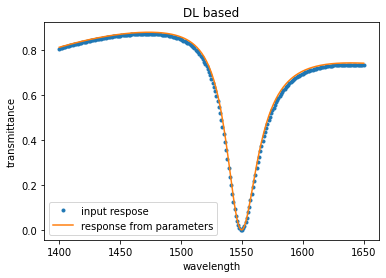

In [ ]:
eval(scaler_R.inverse_transform(X_test[:, 2:])[88], '/content/result_88.txt')

In [ ]:
model_.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               25400     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 65,901
Trainable params: 65,901
Non-trainable params: 0
__________________________________________________

In [ ]:
scaler_ts.inverse_transform(X_test[:, 0:1])[62]

array([233.])

In [ ]:
scaler_period.inverse_transform(X_test[:, 1:2])[62]

array([620.])

In [ ]:
scaler_wsi.inverse_transform(Y_test[:])[62]

array([542.5])

In [ ]:
with open('/content/gdrive/MyDrive/x.csv', 'w') as writefile:
    for i in range(len(X_test)):
      for val in X_test[i:i+1, 2:]:
        

TypeError: ignored

In [ ]:
import glob
all_f = glob.glob('/content/*.txt')

In [ ]:
all_rec = np.ones((9, 251))

In [ ]:
all_req = np.ones((9, 251))

In [ ]:
all_f[0]

'/content/55.txt'

In [ ]:
all_f[0][9:len(all_f[0])-4]

'55'

In [ ]:
for i in range(len(all_f)):
  all_req[i] = X_test[:, 2:][int(all_f[0][9:len(all_f[0])-4])]

In [ ]:
for i in range(len(all_f)):
  df2 = pd.read_table(all_f[i],  header=None, sep='\s+').values
  T_orig = df2[:, 1:]
  all_rec[i] = [item for sublist in T_orig for item in sublist]

In [ ]:
len(all_rec[-1])

251

In [ ]:
header = []

In [ ]:
for i in range(1400, 1651):
  header = np.append(header, str(i))

In [ ]:
all_rec

array([[0.98001, 0.97969, 0.97937, ..., 0.63352, 0.63444, 0.63526],
       [0.80164, 0.80327, 0.8049 , ..., 0.90574, 0.90493, 0.90412],
       [0.73316, 0.73487, 0.73657, ..., 0.95629, 0.95601, 0.95575],
       ...,
       [0.9843 , 0.98374, 0.98318, ..., 0.5491 , 0.54857, 0.54803],
       [0.86567, 0.86462, 0.86356, ..., 0.59543, 0.59477, 0.59412],
       [0.96533, 0.96481, 0.96429, ..., 0.6109 , 0.61021, 0.60952]])

In [ ]:
header

array(['1400', '1401', '1402', '1403', '1404', '1405', '1406', '1407',
       '1408', '1409', '1410', '1411', '1412', '1413', '1414', '1415',
       '1416', '1417', '1418', '1419', '1420', '1421', '1422', '1423',
       '1424', '1425', '1426', '1427', '1428', '1429', '1430', '1431',
       '1432', '1433', '1434', '1435', '1436', '1437', '1438', '1439',
       '1440', '1441', '1442', '1443', '1444', '1445', '1446', '1447',
       '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455',
       '1456', '1457', '1458', '1459', '1460', '1461', '1462', '1463',
       '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471',
       '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479',
       '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487',
       '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495',
       '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503',
       '1504', '1505', '1506', '1507', '1508', '1509', '1510', '1511',
      

In [ ]:
np.savetxt('/content/all_rec_dltr.csv', all_rec, delimiter=',')

In [ ]:
np.savetxt('/content/all_req_dltr1.csv', df_req, delimiter=',')